Battery level study, but only interesting things
====

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
"""
Copy files from RDSF to a local directory so I can read them

"""

from ema import read

read.copy_battery_files()

In [10]:
"""
Create a dataframe of all the battery data

"""

battery_df = read.battery_lvl_df()
battery_df.head()

 79%|███████▉  | 61/77 [00:00<00:00, 299.01it/s]

/home/mh19137/seaco_malaysia/data/battery_dbs/EMADATA_22904_20211209.db failed with Execution failed on sql 'SELECT * FROM Event;': database disk image is malformed
/home/mh19137/seaco_malaysia/data/battery_dbs/EMADATA_20050_20220412.db failed with Execution failed on sql 'SELECT * FROM Event;': database disk image is malformed
/home/mh19137/seaco_malaysia/data/battery_dbs/EMADATA_15082_20220420.db failed with Execution failed on sql 'SELECT * FROM Event;': database disk image is malformed
/home/mh19137/seaco_malaysia/data/battery_dbs/EMADATA_638_20220428.db failed with Execution failed on sql 'SELECT * FROM Event;': database disk image is malformed
/home/mh19137/seaco_malaysia/data/battery_dbs/EMADATA_35272_20220520.db failed with Execution failed on sql 'SELECT * FROM Event;': database disk image is malformed
/home/mh19137/seaco_malaysia/data/battery_dbs/EMADATA_27345_20220615.db failed with Execution failed on sql 'SELECT * FROM Event;': database disk image is malformed
/home/mh1913

100%|██████████| 77/77 [00:00<00:00, 311.09it/s]


/home/mh19137/seaco_malaysia/data/battery_dbs/EMADATA_23532_20220204.db failed with Execution failed on sql 'SELECT * FROM Event;': database disk image is malformed
/home/mh19137/seaco_malaysia/data/battery_dbs/EMADATA_3017_20220204.db failed with Execution failed on sql 'SELECT * FROM Event;': database disk image is malformed


/home/mh19137/seaco_malaysia/ema/clean.py:118: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Normal' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  copy.loc[start_time, col_name] = "Normal"
/home/mh19137/seaco_malaysia/ema/clean.py:189: UserWarning: Long catchup: not marking Meal at 2022-05-19 09:02:49 as catchup
  warnings.warn(


 Open ended catchup at 2022-02-11 20:02:05 ended by No response at 2022-02-12 08:02:11
 Open ended catchup at 2022-02-14 20:26:30 ended by No response at 2022-02-15 08:02:16
 Open ended catchup at 2022-04-19 08:01:14 ended by No catch-up at 2022-04-19 08:01:17
 Open ended catchup at 2022-06-27 15:53:14 ended by Catch-up start at 2022-06-27 15:54:06
 Open ended catchup at 2021-12-31 22:11:10 ended by No catch-up at 2022-01-01 08:01:15
 Open ended catchup at 2022-05-24 07:25:36 ended by Catch-up start at 2022-05-24 07:26:00
 Open ended catchup at 2022-03-21 08:01:57 ended by No catch-up at 2022-03-21 08:02:04
 Open ended catchup at 2022-03-07 18:33:30 ended by No catch-up at 2022-03-07 18:33:34
 Open ended catchup at 2022-03-07 18:37:08 ended by No catch-up at 2022-03-07 18:37:14
 Open ended catchup at 2022-03-07 19:29:23 ended by No response at 2022-03-08 08:02:56
 Open ended catchup at 2022-03-08 08:30:40 ended by No catch-up at 2022-03-08 08:31:08
 Open ended catchup at 2022-03-08 09:

,p_id,battery_lvl,delta,charges,discharges,respondent_sex,respondent_ethnicity,age_dob,residents_id,all_in_ramadan,any_in_ramadan
0,15402,99,1 days 08:00:52,5,6,2.0,1.0,15.0,15402,False,False
1,15402,99,1 days 08:00:52,5,6,2.0,1.0,15.0,15402,False,False
2,15402,99,1 days 08:00:52,5,6,2.0,1.0,15.0,15402,False,False
3,15402,99,1 days 08:00:52,5,6,2.0,1.0,15.0,15402,False,False
4,15402,99,1 days 08:00:52,5,6,2.0,1.0,15.0,15402,False,False


In [15]:
"""
Make a dataframe that doesn't have delta and just has one row per participant

"""

unique_pid_df = (
    battery_df.copy().drop(columns=["delta", "battery_lvl"]).groupby("p_id").first()
)

unique_pid_df.head()

,charges,discharges,respondent_sex,respondent_ethnicity,age_dob,residents_id,all_in_ramadan,any_in_ramadan
p_id,,,,,,,,
141,6,7,2.0,1.0,9.0,141,True,True
765,6,6,1.0,1.0,17.0,765,True,True
924,3,4,2.0,3.0,17.0,924,False,False
1077,7,8,2.0,1.0,14.0,1077,False,False
1097,7,7,2.0,1.0,13.0,1097,False,False


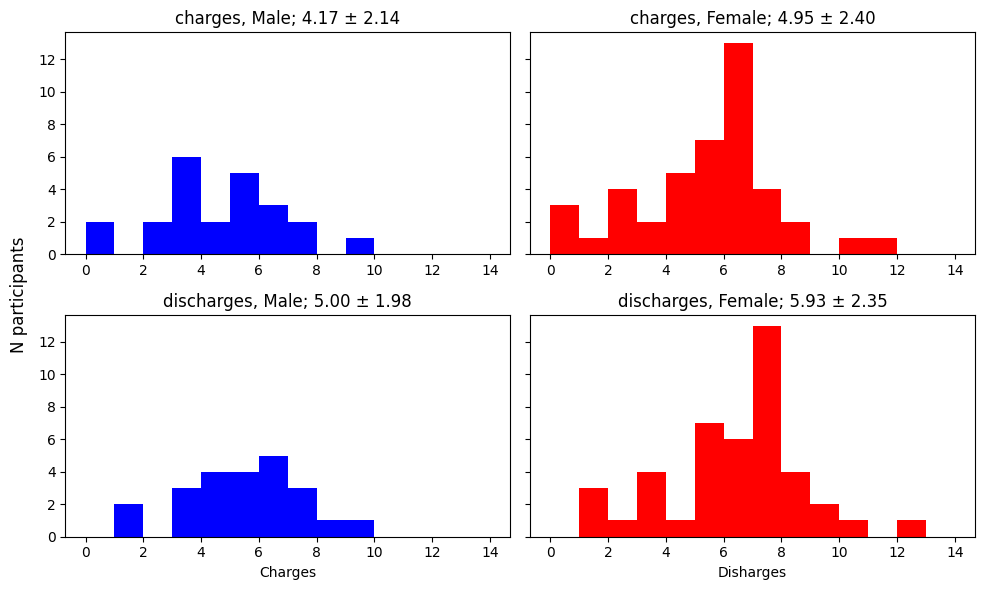

In [16]:
"""
Histogram of number of charging/discharging cycles by sex

"""

import os

import numpy as np
import matplotlib.pyplot as plt

img_dir = "img/battery_level2/"
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

fig, axes = plt.subplots(2, 2, sharey=True, figsize=(10, 6))

hist_kw = {
    "bins": range(15),
    "histtype": "stepfilled",
    "linewidth": 2,
    "alpha": 1,
    "density": False,
}
for axs, col in zip(axes, ["charges", "discharges"]):
    for axis, sex in zip(axs, [1.0, 2.0]):
        data = unique_pid_df[unique_pid_df["respondent_sex"] == sex][col]
        axis.hist(data, **hist_kw, color="b" if sex == 1.0 else "r")

        mean, std = np.mean(data), np.std(data)
        axis.set_title(
            f"{col}, {'Male' if sex == 1.0 else 'Female'}; {mean:.2f} ± {std:.2f}"
        )

fig.supylabel("N participants")


axes[1, 0].set_xlabel("Charges")
axes[1, 1].set_xlabel("Disharges")

fig.tight_layout()
fig.savefig(f"{img_dir}/n_charge_discharge_hist.png")